# QKeras RNN comparison


1. Create a model and compare its performance to the boosted model
2. If the model outreach the performance of the boosted model : 
 -   create a model with the same feature with qkeras (QAT) and 
 -   quantized the keras model (PTQ)
3. Compare those two to PTQ boosted model

The models with keras should converge to around 1e-5 or 9.8e-6

For QKeras it's been somewhere around 1.1e-5 or so



# To Run Everytime

## Imports

In [3]:
import tensorflow as tf
import keras
import numpy as np
import time
import random
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Flatten, LSTM, GRU, SimpleRNN, Conv2D, MaxPooling2D, Flatten, Dropout, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.regularizers import l2, l1, l1_l2
from collections import deque

from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error as mse
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow import keras
from matplotlib import pyplot as plt
from IPython.display import clear_output

import qkeras
from qkeras import *

import hls4ml
import pickle


/atlas/bonnet/miniconda3/envs/hls4ml-tutorial/lib/python3.7/site-packages/hls4ml-0.5.1-py3.7.egg/hls4ml/converters/__init__.py:15: UserWarning: WARNING: Pytorch converter is not enabled!
  warnings.warn("WARNING: Pytorch converter is not enabled!")


In [4]:
# Load libraries if they are changed
%load_ext autoreload
%autoreload 2


## Data creation 

In [5]:
from nnlar.datashaper import DataShaper
ds = DataShaper.from_h5("../../../data/rdgap_mu140.h5")

x, x_val, x_test, y, y_val, y_test = ds()

shapes (1999995, 5, 1) (1999995, 1)
shapes (899992, 5, 1) (99995, 5, 1) (999998, 5, 1)


In [6]:
boosted_model =  tf.keras.models.load_model('/atlas/bonnet/Desktop/code/internship_CPPM/pb_file')

boosted_model.summary()


2022-07-22 13:25:17.195038: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-22 13:25:17.195057: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-22 13:25:17.195069: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (marsattack3): /proc/driver/nvidia/version does not exist
2022-07-22 13:25:17.195229: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 80        
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


## Settings

In [7]:
# settings of the networks 
output = 1

nbr_batch = 128
nbr_epoch = 200
lr=0.001

nbr_conv_epoch = 4 #number of epochs for the conversion 

patience_es = 8
patience_rlr = 5
delta = 0.0000001

def version(v): return (v)
versions_range = 8

def units(j): return (j+8)
units_range = 1
j=0



In [8]:
# path

#path of the tested models 
def models_path32(j,v) : return f"tests/models/models_units={units(j)}_batchsize=32v{version(v)}.h5"
#path of the tested models 
def predicts_path32(j,v) : return f"tests/predicts/models_units={units(j)}_batchsize=32v{version(v)}.npy"

#path of the tested models 
def models_path64(j,v) : return f"tests/models/models_units={units(j)}_batchsize=64v{version(v)}.h5"
#path of the tested models 
def predicts_path64(j,v) : return f"tests/predicts/models_units={units(j)}_batchsize=64v{version(v)}.npy"

#path of the tested models 
def models_path128(j,v) : return f"tests/models/models_units={units(j)}_batchsize=128v{version(v)}.h5"
#path of the tested models 
def predicts_path128(j,v) : return f"tests/predicts/models_units={units(j)}_batchsize=128v{version(v)}.npy"

#path of the tested models 
def models_path256(j,v) : return f"tests/models/models_units={units(j)}_batchsize=256v{version(v)}.h5"
#path of the tested models 
def predicts_path256(j,v) : return f"tests/predicts/models_units={units(j)}_batchsize=256v{version(v)}.npy"


# 3. Compare the results

In [9]:
def exist(path,modeltopred):
    if (os.path.exists(path)==False):
        np.save(path, modeltopred.predict(x_test))
     
    else : print(f'{path} already exists')


## Predictions

In [10]:

ref = 'tests/ref_predicts.npy'
exist(ref, boosted_model)


for v in range (versions_range):
        
    exist(predicts_path32(j,v),tf.keras.models.load_model(models_path32(j,v)))
    exist(predicts_path64(j,v),tf.keras.models.load_model(models_path64(j,v)))
    exist(predicts_path128(j,v),tf.keras.models.load_model(models_path128(j,v)))
    exist(predicts_path256(j,v),tf.keras.models.load_model(models_path256(j,v)))





tests/ref_predicts.npy already exists
tests/predicts/models_units=8_batchsize=32v0.npy already exists
tests/predicts/models_units=8_batchsize=64v0.npy already exists
tests/predicts/models_units=8_batchsize=128v0.npy already exists
tests/predicts/models_units=8_batchsize=256v0.npy already exists
tests/predicts/models_units=8_batchsize=32v1.npy already exists
tests/predicts/models_units=8_batchsize=64v1.npy already exists
tests/predicts/models_units=8_batchsize=128v1.npy already exists
tests/predicts/models_units=8_batchsize=256v1.npy already exists
tests/predicts/models_units=8_batchsize=32v2.npy already exists
tests/predicts/models_units=8_batchsize=64v2.npy already exists
tests/predicts/models_units=8_batchsize=128v2.npy already exists
tests/predicts/models_units=8_batchsize=256v2.npy already exists
tests/predicts/models_units=8_batchsize=32v3.npy already exists
tests/predicts/models_units=8_batchsize=64v3.npy already exists
tests/predicts/models_units=8_batchsize=128v3.npy already ex

## Plotting

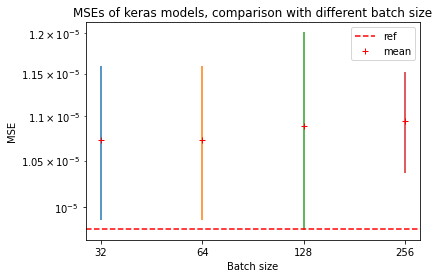

In [11]:
x=[]
bits=[]
mean=[]

error=[]
loss=[]
x.append(0)
bits.append(32)
best_mse=100
worst_mse=00
tmp_loss=[]
sum = 0
for v in range (versions_range):
    y_keras0 = np.load(predicts_path64(j,v))
    tmp_mse = mse(y_test,y_keras0)
    sum = sum+tmp_mse
    tmp_loss.append(tmp_mse)

loss.append(sum/versions_range)
mean.append(sum/versions_range)
error.append(np.std(tmp_loss))
plt.errorbar(x=x,y=loss, yerr=error)

x=[]
error=[]
loss=[]
x.append(1)
bits.append(64)
best_mse=100
worst_mse=00
tmp_loss=[]
sum = 0
for v in range (versions_range):
    y_keras0 = np.load(predicts_path64(j,v))
    tmp_mse = mse(y_test,y_keras0)
    sum = sum+tmp_mse

    tmp_loss.append(tmp_mse)
    if (best_mse>tmp_mse): best_mse=tmp_mse
    if (worst_mse<tmp_mse): worst_mse=tmp_mse      
loss.append(sum/versions_range)
mean.append(sum/versions_range)
error.append(np.std(tmp_loss))
plt.errorbar(x=x,y=loss, yerr=error)

x=[]
error=[]
loss=[]
x.append(2)
bits.append(128)
best_mse=100
worst_mse=00
tmp_loss=[]
sum = 0
for v in range (versions_range):
    y_keras0 = np.load(predicts_path128(j,v))
    tmp_mse = mse(y_test,y_keras0)
    sum = sum+tmp_mse

    tmp_loss.append(tmp_mse)
    if (best_mse>tmp_mse): best_mse=tmp_mse
    if (worst_mse<tmp_mse): worst_mse=tmp_mse      
loss.append(sum/versions_range)
mean.append(sum/versions_range)
error.append(np.std(tmp_loss))
plt.errorbar(x=x,y=loss, yerr=error)


x=[]
error=[]
loss=[]
x.append(3)
bits.append(256)
best_mse=100
worst_mse=00
tmp_loss=[]
sum = 0
for v in range (versions_range):
    y_keras0 = np.load(predicts_path256(j,v))
    tmp_mse = mse(y_test,y_keras0)
    sum = sum+tmp_mse

    tmp_loss.append(tmp_mse)
    if (best_mse>tmp_mse): best_mse=tmp_mse
    if (worst_mse<tmp_mse): worst_mse=tmp_mse      
loss.append(sum/versions_range)
mean.append(sum/versions_range)
error.append(np.std(tmp_loss))

plt.errorbar(x=x,y=loss, yerr=error)

plt.axhline(mse(y_test, np.load(ref)), linestyle="--", color = 'red')
plt.plot(mean, 'r+')
plt.legend(['ref','mean'])
plt.title(f'MSEs of keras models, comparison with different batch size')
plt.ylabel("MSE")
plt.xlabel("Batch size")   
plt.xticks(np.arange(len(bits)), [f"{Bit}" for Bit in bits])
plt.yscale('log')
plt.show()
